In [113]:
# Install Required Library

In [114]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [115]:
%pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [116]:
%pip install yfinance pandas numpy matplotlib scikit-learn scipy statsmodels


Note: you may need to restart the kernel to use updated packages.


In [117]:
%pip install scikit-learn scipy statsmodels


Note: you may need to restart the kernel to use updated packages.


In [118]:
%pip install yfinance --upgrade

Note: you may need to restart the kernel to use updated packages.


In [119]:
#Import Libraries

In [120]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [121]:
#Define Time Range (Today to 60 Days Back)

In [122]:
# Define date range
end_date = datetime.now()
start_date = end_date - timedelta(days=60)

print("Fetching data from:", start_date.strftime('%Y-%m-%d'), "to", end_date.strftime('%Y-%m-%d'))

Fetching data from: 2025-11-29 to 2026-01-28


In [123]:
# Download Hourly Data for Russell 1000 (^RUT)

# Note: The Yahoo Finance ticker for Russell 1000 is ^RUT.
# You can fetch hourly data (1h interval) using interval='1h'.

In [124]:
# Fetch hourly Russell 1000 data
russell1000 = yf.download(
    tickers="^RUI",
    start=start_date,
    end=end_date,
    interval="1h",
    progress=False
)

# Display first few rows
russell1000.head()


Price,Close,High,Low,Open,Volume
Ticker,^RUI,^RUI,^RUI,^RUI,^RUI
Datetime,,,,,
2025-12-01 14:30:00+00:00,3716.798096,3727.472656,3709.559326,3724.851318,0
2025-12-01 15:30:00+00:00,3723.897705,3727.466309,3711.521240,3716.637939,0
2025-12-01 16:30:00+00:00,3728.767578,3731.268555,3723.862793,3723.862793,0
2025-12-01 17:30:00+00:00,3731.485107,3733.151123,3728.154297,3728.940186,0
2025-12-01 18:30:00+00:00,3721.335205,3734.461914,3721.155029,3731.490234,0


In [125]:
# Basic Info and Data Cleaning

In [126]:
# Check for missing values
#print("Missing values per column:\n", russell1000.isna().sum())

# Drop missing data if any
#russell1000 = russell1000.dropna()


# Reset index for easier handling
#russell1000.reset_index(inplace=True)

# Display basic info
#russell1000.info()


# Check missing and duplicate data
print("Missing values before cleaning:\n", russell1000.isnull().sum())
print("Duplicate rows:", russell1000.duplicated().sum())

# Drop duplicates
russell1000 = russell1000.drop_duplicates().sort_index()

# Convert all columns to numeric
russell1000 = russell1000.apply(pd.to_numeric, errors='coerce')

# Fill missing values
russell1000 = russell1000.interpolate(method='linear').fillna(method='ffill').dropna()

print("\nMissing values after cleaning:\n", russell1000.isnull().sum())


Missing values before cleaning:
 Price   Ticker
Close   ^RUI      0
High    ^RUI      0
Low     ^RUI      0
Open    ^RUI      0
Volume  ^RUI      0
dtype: int64
Duplicate rows: 0

Missing values after cleaning:
 Price   Ticker
Close   ^RUI      0
High    ^RUI      0
Low     ^RUI      0
Open    ^RUI      0
Volume  ^RUI      0
dtype: int64


/var/folders/_h/31psf_xs2j99278jwb13_s280000gn/T/ipykernel_4013/2783389939.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  russell1000 = russell1000.interpolate(method='linear').fillna(method='ffill').dropna()


In [127]:
# Quick Visualization
russell1000.columns = [str(col).strip() for col in russell1000.columns]


In [128]:
print(russell1000.columns.tolist())


["('Close', '^RUI')", "('High', '^RUI')", "('Low', '^RUI')", "('Open', '^RUI')", "('Volume', '^RUI')"]


In [129]:
# Flatten columns just in case
russell1000.columns = [str(col).strip() for col in russell1000.columns]

# If datetime is in the index, move it to a column
if russell1000.index.name is not None:
    russell1000 = russell1000.reset_index()

# Try to find the datetime-like column automatically
possible_time_cols = ['Datetime', 'Date', 'datetime', 'date', 'Timestamp', 'timestamp']
for col in possible_time_cols:
    if col in russell1000.columns:
        russell1000 = russell1000.rename(columns={col: 'Datetime'})
        break
else:
    raise KeyError(f"No datetime column found. Columns available: {russell1000.columns.tolist()}")

# Convert to datetime type
russell1000['Datetime'] = pd.to_datetime(russell1000['Datetime'])


In [130]:
# Save Dataset

In [131]:
russell1000.to_csv('russell1000_hourly_60days.csv', index=False)
print("Dataset saved successfully!")


Dataset saved successfully!


In [132]:
# Data Preprocessing & Exploratory Analysis

In [133]:
#To clean, preprocess, and understand your Russell 2000 dataset —
#identify missing data, normalize and smooth it, and perform simple statistical analysis to uncover key trends or anomalies.

In [134]:
#Data Cleaning

In [135]:
import pandas as pd
import numpy as np

# Preview dataset
russell1000.head()


,Datetime,"('Close', '^RUI')","('High', '^RUI')","('Low', '^RUI')","('Open', '^RUI')","('Volume', '^RUI')"
0,2025-12-01 14:30:00+00:00,3716.798096,3727.472656,3709.559326,3724.851318,0
1,2025-12-01 15:30:00+00:00,3723.897705,3727.466309,3711.521240,3716.637939,0
2,2025-12-01 16:30:00+00:00,3728.767578,3731.268555,3723.862793,3723.862793,0
3,2025-12-01 17:30:00+00:00,3731.485107,3733.151123,3728.154297,3728.940186,0
4,2025-12-01 18:30:00+00:00,3721.335205,3734.461914,3721.155029,3731.490234,0


In [136]:
#Handle Missing Values

In [137]:
# Check for missing values
print("Missing values per column:\n", russell1000.isna().sum())

# Option 1: Forward-fill then back-fill (good for time series)
russell1000.fillna(method='ffill', inplace=True)
russell1000.fillna(method='bfill', inplace=True)

# Verify
print("Missing values after filling:\n", russell1000.isna().sum())


Missing values per column:
 Datetime              0
('Close', '^RUI')     0
('High', '^RUI')      0
('Low', '^RUI')       0
('Open', '^RUI')      0
('Volume', '^RUI')    0
dtype: int64
Missing values after filling:
 Datetime              0
('Close', '^RUI')     0
('High', '^RUI')      0
('Low', '^RUI')       0
('Open', '^RUI')      0
('Volume', '^RUI')    0
dtype: int64


/var/folders/_h/31psf_xs2j99278jwb13_s280000gn/T/ipykernel_4013/3233688769.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  russell1000.fillna(method='ffill', inplace=True)
/var/folders/_h/31psf_xs2j99278jwb13_s280000gn/T/ipykernel_4013/3233688769.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  russell1000.fillna(method='bfill', inplace=True)


In [138]:
#Ensure Correct Data Types

In [139]:
# Convert datetime column (if not already)
russell1000['Datetime'] = pd.to_datetime(russell1000['Datetime'])

# Sort by time (important for time series)
russell1000.sort_values('Datetime', inplace=True)
russell1000.reset_index(drop=True, inplace=True)


In [140]:
#Simple Statistical Analysis
print(russell1000.columns.tolist())


['Datetime', "('Close', '^RUI')", "('High', '^RUI')", "('Low', '^RUI')", "('Open', '^RUI')", "('Volume', '^RUI')"]


In [141]:
# Clean multiindex-style column names
russell1000.columns = (
    russell1000.columns
    .str.replace(r"[\(\)']", "", regex=True)  # remove parentheses and quotes
    .str.replace(",.*", "", regex=True)       # remove everything after the comma
    .str.strip()                               # trim whitespace
)


count    268.000000
mean       0.000094
std        0.002326
min       -0.010893
25%       -0.000867
50%        0.000089
75%        0.000886
max        0.011362
Name: Returns, dtype: float64


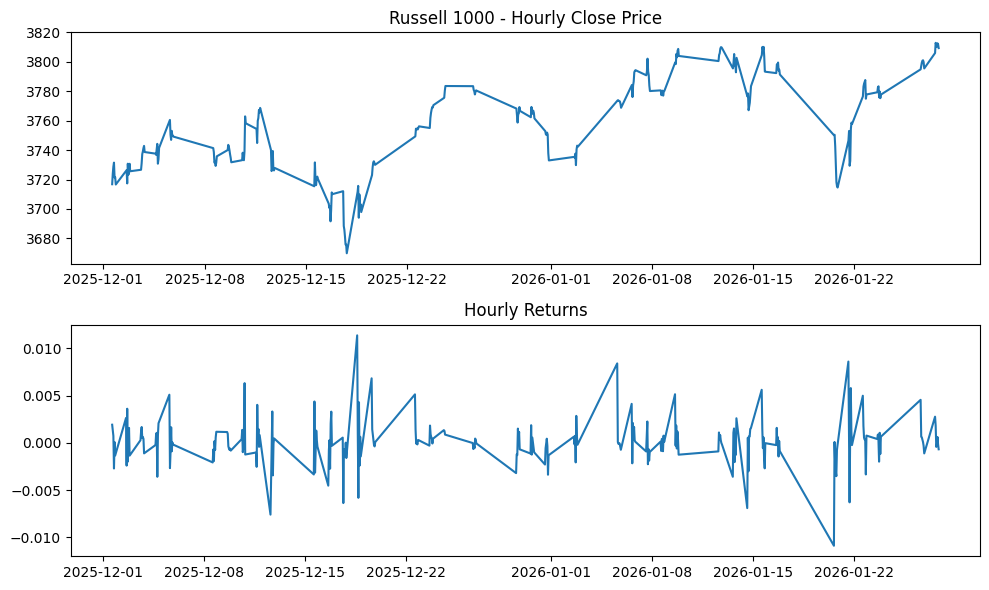

In [142]:
# Descriptive statistics
russell1000.describe()

# Calculate basic returns
russell1000['Returns'] = russell1000['Close'].pct_change()

# Summary of returns
print(russell1000['Returns'].describe())

# Plot price vs returns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(russell1000['Datetime'], russell1000['Close'])
ax[0].set_title('Russell 1000 - Hourly Close Price')

ax[1].plot(russell1000['Datetime'], russell1000['Returns'])
ax[1].set_title('Hourly Returns')
plt.tight_layout()
plt.show()


In [143]:
#Normalisation Methods

In [144]:
#Normalization helps when comparing or feeding data into models. Let’s try different techniques.

In [145]:
#Log Transformation
#Stabilizes variance and reduces impact of large values.

In [146]:
russell1000['Log_Close'] = np.log(russell1000['Close'])


In [147]:
#Z-score Normalization

#Centers data around mean (0) with standard deviation (1).

In [148]:
russell1000['Zscore_Close'] = (russell1000['Close'] - russell1000['Close'].mean()) / russell1000['Close'].std()


In [149]:
#Min-Max Scaling

#Scales all values between 0 and 1.

In [150]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
russell1000['MinMax_Close'] = scaler.fit_transform(russell1000[['Close']])


In [151]:
#Visualize Comparison

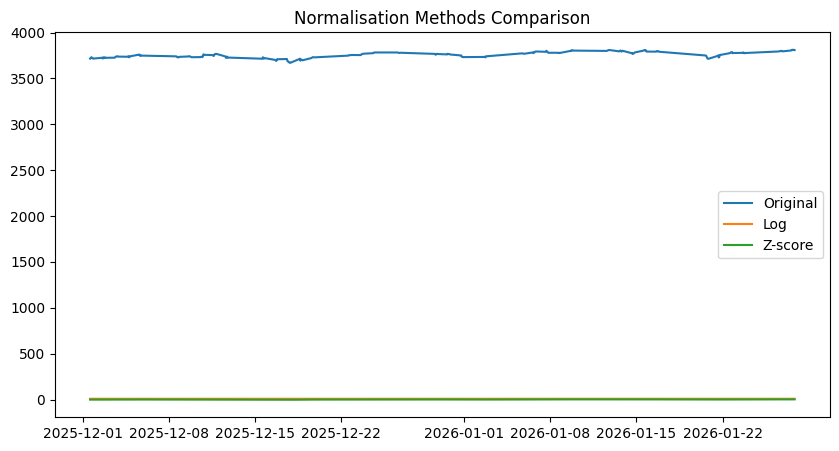

In [152]:
plt.figure(figsize=(10,5))
plt.plot(russell1000['Datetime'], russell1000['Close'], label='Original')
plt.plot(russell1000['Datetime'], russell1000['Log_Close'], label='Log')
plt.plot(russell1000['Datetime'], russell1000['Zscore_Close'], label='Z-score')
plt.legend()
plt.title("Normalisation Methods Comparison")
plt.show()


In [153]:
#Smoothing / Noise Reduction

#Smoothing helps remove short-term volatility and highlight trends.

In [154]:
#Rolling Mean (Moving Average)

In [155]:
russell1000['MA_5'] = russell1000['Close'].rolling(window=5).mean()   # 5-hour moving average
russell1000['MA_10'] = russell1000['Close'].rolling(window=10).mean()


In [156]:
#Exponential Moving Average (EMA)
#Gives more weight to recent prices.

In [157]:
russell1000['EMA_5'] = russell1000['Close'].ewm(span=5, adjust=False).mean()
russell1000['EMA_10'] = russell1000['Close'].ewm(span=10, adjust=False).mean()


In [158]:
#Savitzky–Golay Filter(advanced smoothing)

In [159]:
from scipy.signal import savgol_filter

russell1000['Smooth_Close'] = savgol_filter(russell1000['Close'], window_length=7, polyorder=2)


In [160]:
#Plot Smoothed Data

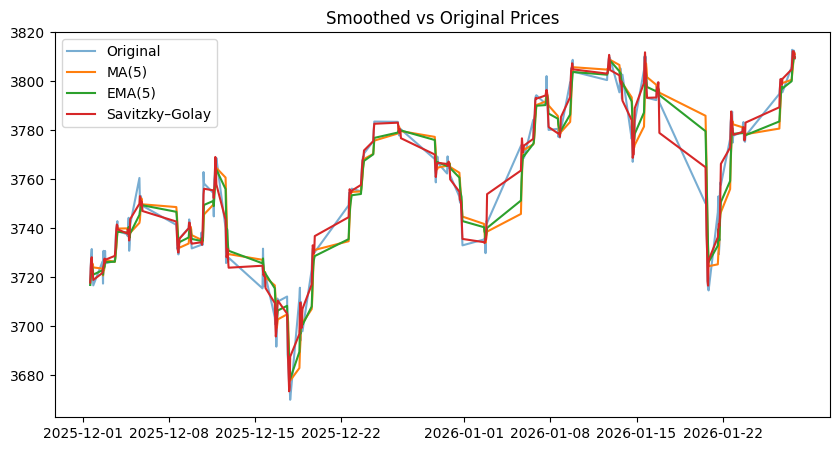

In [161]:
plt.figure(figsize=(10,5))
plt.plot(russell1000['Datetime'], russell1000['Close'], label='Original', alpha=0.6)
plt.plot(russell1000['Datetime'], russell1000['MA_5'], label='MA(5)')
plt.plot(russell1000['Datetime'], russell1000['EMA_5'], label='EMA(5)')
plt.plot(russell1000['Datetime'], russell1000['Smooth_Close'], label='Savitzky–Golay')
plt.legend()
plt.title('Smoothed vs Original Prices')
plt.show()


In [162]:
#Correlation & Volatility Analysis

#You can check relationships between features and volatility trends.

             Open      High       Low     Close  Volume   Returns
Open     1.000000  0.989432  0.986576  0.976228     NaN -0.043558
High     0.989432  1.000000  0.983029  0.986985     NaN  0.048638
Low      0.986576  0.983029  1.000000  0.989434     NaN  0.056469
Close    0.976228  0.986985  0.989434  1.000000     NaN  0.139928
Volume        NaN       NaN       NaN       NaN     NaN       NaN
Returns -0.043558  0.048638  0.056469  0.139928     NaN  1.000000


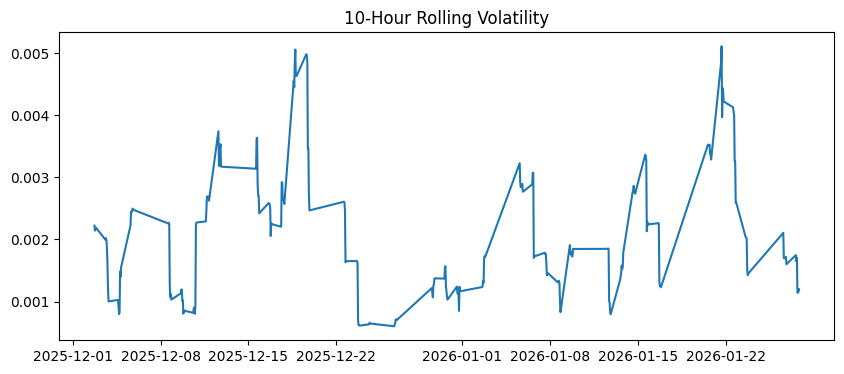

In [163]:
# Correlation matrix
corr = russell1000[['Open','High','Low','Close','Volume','Returns']].corr()
print(corr)

# Volatility (Rolling Std)
russell1000['Volatility'] = russell1000['Returns'].rolling(window=10).std()

plt.figure(figsize=(10,4))
plt.plot(russell1000['Datetime'], russell1000['Volatility'])
plt.title('10-Hour Rolling Volatility')
plt.show()


In [164]:
#Save the Cleaned & Processed Dataset

In [165]:
russell1000.to_csv('russell1000_preprocessed.csv', index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.


In [166]:
russell1000

,Datetime,Close,High,Low,Open,Volume,Returns,Log_Close,Zscore_Close,MinMax_Close,MA_5,MA_10,EMA_5,EMA_10,Smooth_Close,Volatility
0,2025-12-01 14:30:00+00:00,3716.798096,3727.472656,3709.559326,3724.851318,0,NaN,8.220618,-1.275712,0.328068,NaN,NaN,3716.798096,3716.798096,3717.775844,NaN
1,2025-12-01 15:30:00+00:00,3723.897705,3727.466309,3711.521240,3716.637939,0,0.001910,8.222526,-1.056593,0.377698,NaN,NaN,3719.164632,3718.088934,3723.827148,NaN
2,2025-12-01 16:30:00+00:00,3728.767578,3731.268555,3723.862793,3723.862793,0,0.001308,8.223833,-0.906291,0.411742,NaN,NaN,3722.365614,3720.030505,3727.278181,NaN
3,2025-12-01 17:30:00+00:00,3731.485107,3733.151123,3728.154297,3728.940186,0,0.000729,8.224562,-0.822418,0.430739,NaN,NaN,3725.405445,3722.113160,3728.128941,NaN
4,2025-12-01 18:30:00+00:00,3721.335205,3734.461914,3721.155029,3731.490234,0,-0.002720,8.221838,-1.135681,0.359785,3724.456738,NaN,3724.048699,3721.971714,3723.976690,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2026-01-27 16:30:00+00:00,3811.242920,3814.481934,3807.876465,3812.874512,0,-0.000439,8.245711,1.639195,0.988295,3805.095361,3801.903296,3806.649994,3801.003370,3812.324300,0.001705
265,2026-01-27 17:30:00+00:00,3810.288086,3811.428711,3805.747803,3811.185547,0,-0.000251,8.245460,1.609725,0.981621,3807.192480,3803.442676,3807.862691,3802.691501,3812.342971,0.001144
266,2026-01-27 18:30:00+00:00,3812.623291,3812.940186,3810.075928,3810.346436,0,0.000613,8.246073,1.681798,0.997945,3810.613574,3804.973047,3809.449558,3804.497281,3812.254360,0.001143
267,2026-01-27 19:30:00+00:00,3811.972656,3814.097900,3811.662109,3812.667480,0,-0.000171,8.245902,1.661717,0.993397,3811.808838,3806.221387,3810.290591,3805.856440,3811.307460,0.001155


Train size: (199, 9) Test size: (50, 9)

Linear Regression Performance:
  MAE  : 6.8930
  MSE  : 121.8588
  RMSE : 11.0390
  R²   : 0.8354


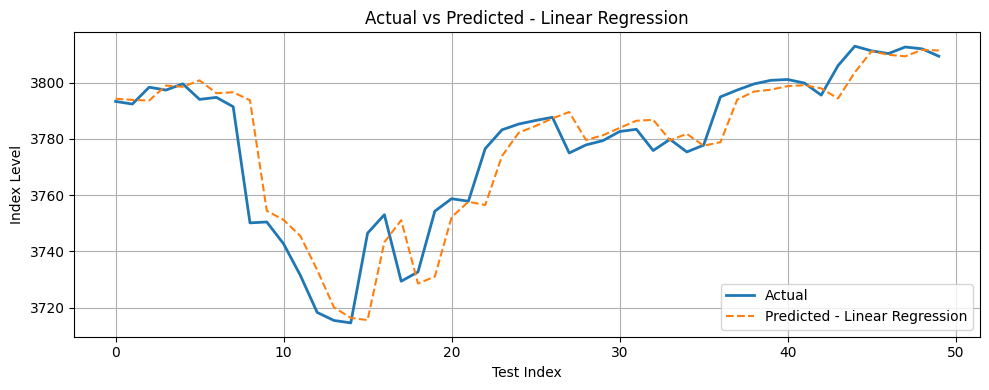


Random Forest Performance:
  MAE  : 10.0552
  MSE  : 202.0427
  RMSE : 14.2142
  R²   : 0.7271


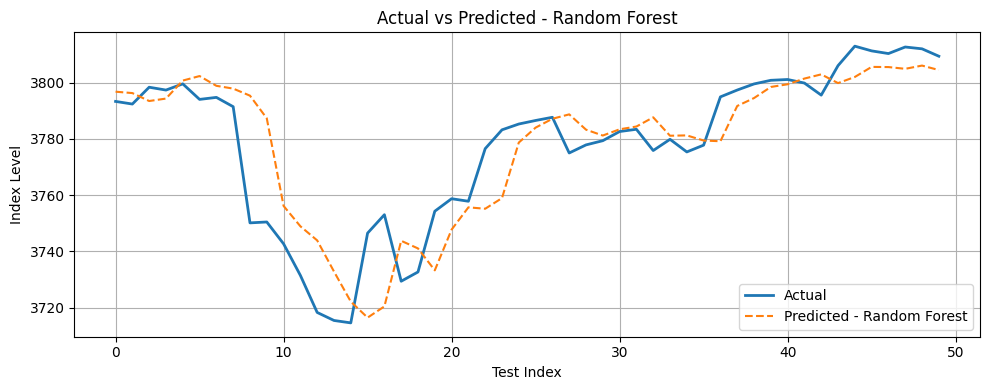


Random Forest Feature Importances:
  Close_lag1: 0.7078
  EMA_10: 0.1181
  Close_lag2: 0.0840
  Log_Returns: 0.0332
  Volatility: 0.0166
  SMA_20: 0.0155
  EMA_20: 0.0134
  SMA_10: 0.0114
  Sentiment: 0.0000

Fitting ARIMA model (this may take a bit)...

ARIMA(2,1,2) Performance:
  MAE  : 26.1453
  MSE  : 1293.6360
  RMSE : 35.9672
  R²   : -0.7831


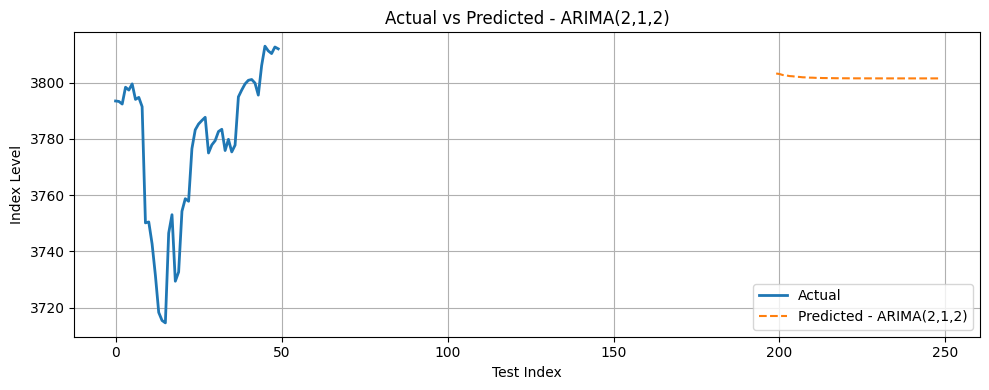


=== MODEL COMPARISON (SPRINT 2) ===
                         MAE       RMSE        R2
Linear Regression   6.893010  11.038968  0.835421
Random Forest      10.055228  14.214172  0.727127
ARIMA(2,1,2)       26.145281  35.967152 -0.783098


In [167]:
# ============================
# SPRINT 2: MODELLING & COMPARISON
# ============================

# 1) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# If statsmodels is available, we'll use ARIMA (optional)
try:
    from statsmodels.tsa.arima.model import ARIMA
    HAS_ARIMA = True
except ImportError:
    HAS_ARIMA = False
    print("statsmodels not installed – ARIMA part will be skipped.")


# 2) Make sure russell2000 is clean & sorted
# (Assumes you already have russell2000 from Sprint 1)

russell1000.columns = [str(c).strip() for c in russell1000.columns]

if 'Datetime' in russell1000.columns:
    russell1000['Datetime'] = pd.to_datetime(russell1000['Datetime'])
    russell1000 = russell1000.sort_values('Datetime').reset_index(drop=True)

# Ensure we have a "Close" column
if 'Close' not in russell1000.columns:
    close_candidates = [c for c in russell1000.columns if 'Close' in c or 'close' in c]
    if len(close_candidates) == 0:
        raise ValueError("No Close column found – please check your column names.")
    russell1000 = russell1000.rename(columns={close_candidates[0]: 'Close'})

df = russell1000.copy()


# 3) Feature engineering
# --------------------------

# Log returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Simple moving averages
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Exponential moving averages
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# Rolling volatility (std dev of returns)
df['Volatility_10'] = df['Log_Returns'].rolling(window=10).std()

# Lag features (t-1, t-2)
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)

# Target: next-period close
df['Target'] = df['Close'].shift(-1)

# Drop NaNs from rolling / shifts
df = df.dropna().reset_index(drop=True)
# Add dummy News column (until we fetch real FinBERT/VADER news later)
df["News"] = "Market is stable today"

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df["Sentiment"] = df["News"].apply(lambda x: analyzer.polarity_scores(str(x))["compound"])

df["News"] = "Market is stable today"
feature_cols = [
    'Close_lag1', 'Close_lag2', 'Log_Returns',
    'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20',
    'Volatility', 'Sentiment'
]

# Drop NaNs from rolling / shifts














analyzer = SentimentIntensityAnalyzer()

df["News"] = "Market is stable today"   # TEMP placeholder text

df["Sentiment"] = df["News"].apply(
    lambda x: analyzer.polarity_scores(str(x))["compound"]
)



# === ADD SENTIMENT ANALYSIS HERE ===
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Create a dummy News column (until you have real text from FinBERT/VADER pipeline)
df["News"] = "Market is stable today"
# Create sentiment score from the "News" column
df["Sentiment"] = df["News"].apply(
    lambda x: analyzer.polarity_scores(str(x))["compound"]
)

# Create sentiment score from News column
df["News"] = "Market is stable today"
df["Sentiment"] = df["News"].apply(lambda x: analyzer.polarity_scores(str(x))["compound"])
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# 4) Prepare features & train/test split
# -----------------------------------------

features = [
    'Close_lag1', 'Close_lag2', 'Log_Returns',
    'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20',
    'Volatility',
    'Sentiment'    # ✅ add this line
]



X = df[feature_cols].values
y = df['Target'].values

# Time-based split (no shuffle)
split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Train size:", X_train.shape, "Test size:", X_test.shape)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5) Helper functions (metrics + plots)
# ----------------------------------------

def evaluate_model(name, y_true, y_pred, results_dict):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    results_dict[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
    
    print(f"\n{name} Performance:")
    print(f"  MAE  : {mae:.4f}")
    print(f"  MSE  : {mse:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  R²   : {r2:.4f}")
    
    return results_dict


def plot_actual_vs_pred(name, y_true, y_pred):
    plt.figure(figsize=(10, 4))
    plt.plot(y_true, label='Actual', linewidth=2)
    plt.plot(y_pred, label=f'Predicted - {name}', linestyle='--')
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Test Index')
    plt.ylabel('Index Level')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 6) MODELS
# -----------------
results = {}

# 6.1 Linear Regression (baseline)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
results = evaluate_model("Linear Regression", y_test, y_pred_lr, results)
plot_actual_vs_pred("Linear Regression", y_test, y_pred_lr)


# 6.2 Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
results = evaluate_model("Random Forest", y_test, y_pred_rf, results)
plot_actual_vs_pred("Random Forest", y_test, y_pred_rf)

print("\nRandom Forest Feature Importances:")
importances = rf_model.feature_importances_
for col, imp in sorted(zip(feature_cols, importances), key=lambda x: x[1], reverse=True):
    print(f"  {col}: {imp:.4f}")


# 6.3 ARIMA (optional, traditional time-series model)
if HAS_ARIMA:
    print("\nFitting ARIMA model (this may take a bit)...")
    # Use log-transformed close
    series_log = np.log(df['Close'])
    train_series = series_log[:split_index]
    test_series = series_log[split_index:]
    
    arima_order = (2, 1, 2)   # simple starting order; can be tuned
    
    arima_model = ARIMA(train_series, order=arima_order)
    arima_result = arima_model.fit()
    
    forecast_log = arima_result.forecast(steps=len(test_series))
    forecast = np.exp(forecast_log)  # back-transform
    
    y_test_arima = df['Close'].values[split_index:]
    
    results = evaluate_model("ARIMA(2,1,2)", y_test_arima, forecast, results)
    plot_actual_vs_pred("ARIMA(2,1,2)", y_test_arima, forecast)
else:
    print("\nSkipping ARIMA – statsmodels not available.")


# 7) Final comparison table
# ----------------------------

results_df = pd.DataFrame(results).T
results_df = results_df[['MAE', 'RMSE', 'R2']]  # column order
print("\n=== MODEL COMPARISON (SPRINT 2) ===")
print(results_df)

results_df
feature_cols = [
    "Close", "Log_Returns", "SMA_10", "SMA_20",
    "EMA_10", "EMA_20",
    "Close_lag1", "Close_lag2",
    "Sentiment"   # <-- Add this!
]
